### **Biological Signals Analysis 2023**
### **Week 7 Exercise & Homework - Poisson Processes Continued**

### **Homework Due Date: March 6, 2024**

#### **Table of Contents:**
- **Review**
  - Convolutions
- **Poisson Process: Math Overview**
  - Introduction
  - Homogeneous Poisson Process
  - Heterogeneous Poisson Process
- **Properties of Signals and Spike Trains**
  - Fano Factor and Coefficient of Variation
  - Poisson Spike Generator
- **Homework Exercise: Generate and Model Poissonian Spike Trains**
  - Load Data
  - Generate Spike Trains
  - Fano Factor
  - Coefficient of Variation
  - Rate of fire

### **Review**

##### Convolutions

We previously met the convolution operator:

$
    (f*g)(t) \equiv \int_0^t f(t-\tau)g(\tau)d\tau
$

and its discrete brother with their commutative property:

$
    (f*g)[n] \equiv \sum_{m=-\infty}^{\infty} f[m]g[n-m] =  \sum_{m=-\infty}^\infty f[n-m]g[m]
$

The important points being:
-  Convolution is the standard way to multiply functions, since multiplying them element-wise doesn't make sense most of the time.
- The operation itself requires pretty basic calculus.

### **Poisson Process** 

#### Introduction

The introduction of convolution in our discussion was motivated by the necessity for a rigorous method to compute the average of our spike sequence:

$
\rho (t) = \sum_{i=1}^{n} \delta (t-t_i)
$

Convolving a spike train with a temporal window yields $r(t)$, the time-varying spike rate. Examination of the aforementioned equation reveals its representation of a Linear Time-Invariant (LTI) system, characterized by a summation of delta functions at distinct time points. This observation underpins the mathematical foundations of our subsequent analysis.

Our objective is to delineate and scrutinize spike trains, explicitly excluding sub-threshold activities and treating spikes from a singular neuron as uniform. These presumptions, while rational, necessitate explicit acknowledgment. We acknowledge the inherent variability in spike timings; identical experimental conditions do not guarantee reproducible neuronal responses.

The focus is on developing a model that quantifies the **probability** of observing a specific spike or sequence of spikes in response to a stimulus. While this model does not enable the prediction of every spike, it significantly enhances our comprehension of neural encoding and decoding mechanisms. By defining the probability density function (PDF) of spike timings $p(t_1,\ldots,t_n)$ and integrating it over a time window $\Delta t$, we obtain the aggregate probability for an $n$-spike sequence within specified intervals:

$
P(t_1,\ldots,t_n) = p(t_1,\ldots,t_n) (\Delta t)^n
$

The assumption of having comprehensive knowledge of $p(t_1,\ldots,t_n)$ for all instances is impractical due to the diversity in spike train patterns, which complicates any attempt to precisely approximate this function. A statistical approach to model all potential spike trains may offer a more generalized framework. The firing rate $r(t)$ is defined as the likelihood of a neuron firing within a brief interval around $t$. However, this rate might be influenced by preceding spikes, necessitating information on past events to predict subsequent ones, expressed as:

$
    P(t) = P(t_n|t_1, \ldots, t_{n-1})
$

This presents a substantial challenge, as accurately simulating this probability function is complex. Simplification to consider spike probability at time $t$ as only dependent on the immediate preceding spike leads to:

$
    P(t_n|t_{n-1})
$

Termed a renewal process, this formulation is somewhat more tractable. Nevertheless, if spike probability is deemed independent of prior spikes, we are describing a Poisson Process, aligning with the "independent spike hypothesis".

In conclusion, the probability of observing a spike at a given time $t$ is denoted by $P(t)$ and is contingent solely on $r(t)$. The likelihood of encountering a specific spike train with spikes at times $t_1, t_2, ..., t_n$ is captured by $P(t_1, t_2, ..., t_n)$. The probability distribution function of $P$ is $p$, indicating the probability of observing a particular spike train is $p(t_1, ..., t_n)(\Delta t)^n$. The spike train model, represented by $\rho(t) = \sum_{i=1}^{n}{\delta (t - t_i)}$, will be convolved with a window function to derive $r(t)$. This systematic approach enables a comprehensive analysis of spike trains and their underlying probabilistic structures.

#### Homogeneous Poisson Process

To further simplify our analysis, we will proceed under the assumption that $r(t)$ is constant over time, denoted simply as $r$. This scenario is defined as a **Homogeneous Poisson Process**. The question then arises: what is the probability of observing a specific spike train $P(t_1, \ldots, t_n)$ within the framework of a homogeneous Poisson process?

We begin by considering the factors on which this process might depend. To this end, we introduce a broader function $P_T(n)$, which represents the probability that any sequence of $n$ spikes occurs within a trial duration of $T$. This leads us to question the dependencies of $P_T(n)$. By partitioning the total observation period $T$ into $M$ intervals of length $\Delta t = \frac{T}{M}$, and assuming $\Delta t$ is sufficiently small to preclude the occurrence of more than one spike within any interval, we identify three critical factors influencing $P_T(n)$:

1. **Combinatorial Placement of Spikes**: The number of ways to distribute $n$ spikes across $M$ bins, computed combinatorially as $\binom{M}{n}$.
2. **Probability of Observing $n$ Spikes**: Given the probability of a single spike in a bin is $r\Delta t$, the probability for $n$ such events is $(r \Delta t)^{n}$.
3. **Probability of No Spike in Remaining Bins**: With $M - n$ bins left unoccupied by spikes, the probability of no spikes occurring in these bins is $(1 - r \Delta t)^{M-n}$.

By multiplying these factors, we derive the following expression:

$
P_T(n) = \lim_{\Delta t \rightarrow 0} \binom{M}{n} (r \Delta t)^n (1 - r \Delta t)^{M - n}
$

This limit is approached as $\Delta t \rightarrow 0$, ensuring the precision of our calculation by validating our assumptions. Assuming a large $M$ due to the smallness of $\Delta t$, we approximate $M - n \approx M$ and simplify a component of the binomial coefficient, yielding:

$
\begin{aligned}
\frac{M!}{(M-n)!} \approx M^n  = \left( \frac{T}{\Delta t} \right)^n \ & ; \ \lim_{\Delta t \rightarrow 0} (1 - r \Delta t)^{M-n} = e^{-rT} \\
 \Downarrow & \\
P_T(n) = & \frac{(rT)^n}{n!}e^{-rT}
\end{aligned}
$

This equation epitomizes the Poisson distribution, with Figure 2 illustrating typical values for $P_T(n)$. Upon establishing this function, we revisit the initially measured spike train $P(t_1,\ldots,t_n)$. Although not demonstrated here, the comprehensive relationship between these two distributions is encapsulated by:

$
P(t_1,\ldots,t_n) = n! P_T(n) \left( \frac{\Delta t}{T} \right)^n
$

<br>
</br>

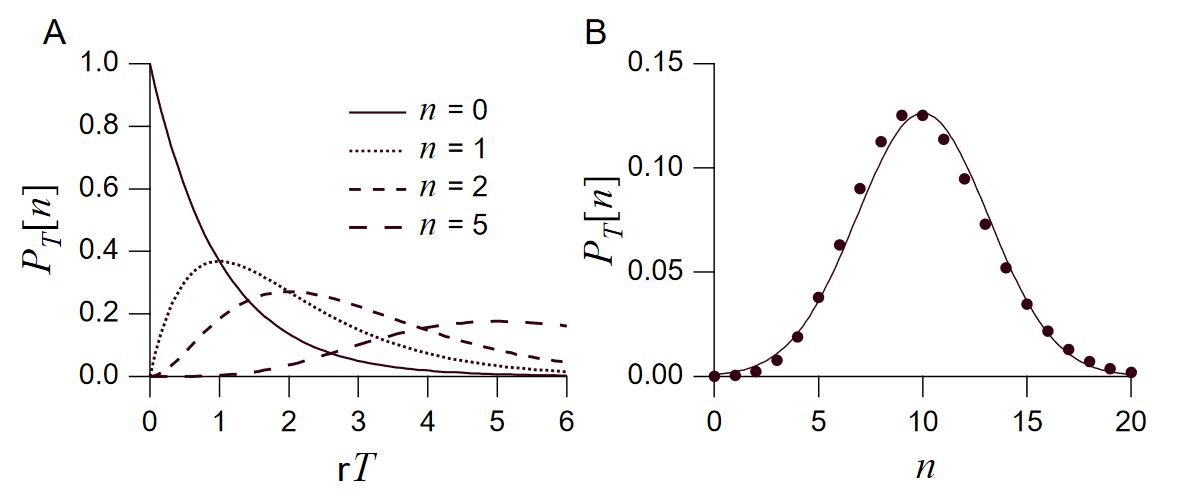

*Figure:*
- *A) Probability to generate $n$ spikes in a time period $T$ for different numbers of spikes $n$.*
- *B) Probability to find $n$ spikes when $rT = 10$. The plotted line is a Gaussian distribution with mean equal to 10.*

#### Inhomogeneous Poisson Process

The inhomogeneous case, in which $r = r(t)$, implies that every sequence of spikes has its own probability, even when it has exactly $n$ spikes. In
Anan's presentation you can see how to derive that the probability density for an $n$-spike train is

$
p(t_1,\ldots,t_n)=\exp\left( -\int_{0}^{T}r(t)dt \right)
\prod_{i=1}^{n}r(t_i)
$

where $t_1,\ldots,t_n$ are ordered. This equation still assumes that each spike is independent of the previous one.

### **Properties of Signals and Spike Trains**

#### Fano factor

In this part we'll explore some statistical properties of the $P_T(n)$ PDF, namely its variance and mean. We've already seen in exercise 1 that the variance of Poisson process is equal to the coefficient of the distribution:

$
\sigma_n^2 = \left<n^2\right> - \left<n\right>^2 = rT
$

where the $\left<\right>$ sign implies calculating the expected value. The mean of such a process is again $\left<n\right>=\mu$, making the variance and mean equal.


The ratio of the variance ($\sigma^2$) to the mean ($\mu$) of the number of events in the process is called *Fano factor*, and can be used to describe a real, measured spike train when we wish to compare it to a true (idealized) homogeneous Poisson process, in which it's equal to one. The Fano factor is a measure used quantify the variability or dispersion of a set of values. Specifically, when applied to a Poisson process, the Fano factor provides insight into the degree of variance relative to the mean of the number of events occurring within a fixed interval of time or space.

$
\text{Fano factor} \equiv F = \frac{\sigma_n^2}{\left< n \right>} = \frac{\sigma_n^2}{\mu}
$

As a reminder, in a Poisson process, events occur independently at a constant average rate. The hallmark of a Poisson process is that the number of events occurring in any interval of time or space follows a Poisson distribution, for which the variance equals the mean. This is a key property that characterizes the Poisson distribution and distinguishes it from other types of distributions.

For a pure Poisson process, the Fano factor equals 1 ($F = 1$) because, as mentioned, the variance of the number of events equals the mean ($\sigma^2 = \mu$). Therefore, a Fano factor of 1 indicates a Poisson distribution of events, reflecting that the dispersion or spread of the data is exactly what would be expected based on the Poisson assumption of a constant average rate of occurrence.

A Fano factor greater than 1 ($F > 1$) indicates overdispersion relative to a Poisson process, suggesting that the variance is larger than the mean. This could imply clustering or correlation among events, which violates the Poisson assumption of independence. Conversely, a Fano factor less than 1 ($F < 1$) indicates underdispersion, where the variance is smaller than the mean, suggesting a more regular or uniform distribution of events than what a Poisson process would predict.

The figure below shows the distribution that can help us calculate the Fano factor.

<br>
</br>

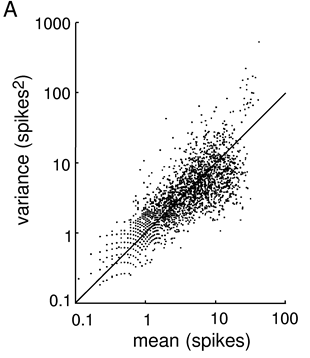

*Figure: Aggregation of spike trains from multiple neurons are usually position around a value of 1 for the Fano factor.*

#### Coefficient of Variation

The coefficient of variation (CV) is a statistical measure of the relative variability of a distribution, expressed as the ratio of the standard deviation to the mean. For a Poisson process, which is a stochastic process that models events occurring randomly in time or space with a constant mean rate, the CV has a particular significance.

Given a Poisson distribution, the mean (average rate of events per interval) and variance (measure of the dispersion of the event counts) are both equal to $ \lambda $, where $ \lambda $ is the rate parameter of the process. This parameter $ \lambda $ represents the average number of events in a given time interval.

The mean ($ \mu $) and variance ($ \sigma^2 $) of a Poisson distribution are therefore:

- $ \mu = \lambda $
- $ \sigma^2 = \lambda $

For a Poisson process, the standard deviation ($ \sigma $) is the square root of the variance, so:

- $ \sigma = \sqrt{\lambda} $

The coefficient of variation (CV) is defined as the ratio of the standard deviation to the mean:

$
C_V = \frac{\sigma}{\mu}
$

Substituting the expressions for $ \sigma $ and $ \mu $ in terms of $ \lambda $ gives:

$
C_V = \frac{\sqrt{\lambda}}{\lambda} = \frac{1}{\sqrt{\lambda}}
$

**When this coefficient is bigger than one, The neurons are usually bursty. When it's lower, we're usually dealing with a regular neurons, deterministic in character (i.e. integrates and fires).**

For processes in which the next spike depends on the previous one, the Fano factor approaches $C_V^2$ over long time intervals. 

However, this equation does not directly apply to the interspike intervals of a Poisson process, which are the times between consecutive events. For the interspike intervals, the mean ($ \left<\tau\right> $) and variance ($ \sigma_\tau^2 $) calculations are different, as shown in the provided equations.

For the interspike intervals of a Poisson process, the mean interspike interval is given by:

$
\begin{aligned}
\left<\tau\right> & = \int_0^\infty \tau p(\tau) d\tau \\
& = \int_0^\infty \tau r e^{-r\tau} d\tau \\
& = r \int_0^\infty \tau e^{-r\tau} d \tau \text{    (Gamma function)}\\
& = r \left[ \frac{1}{r^2} \right] = \frac{1}{r}
\end{aligned}
$

and the variance of the interspike intervals is:

$
\sigma_\tau^2 = \int_0^\infty \tau^2 r e^{-r\tau} d\tau - \left< \tau \right>^2 = \frac{1}{r^2}
$

Thus:

- The mean interspike interval $ \left<\tau\right> $ is $ \frac{1}{r} $, where $ r $ is the rate of the process.
- The variance of the interspike intervals $ \sigma_\tau^2 $ is $ \frac{1}{r^2} $.

Thus, for interspike intervals in a Poisson process, the coefficient of variation $ C_V $ is calculated as:

$
C_V = \frac{\sigma_\tau}{\left< \tau \right>} = \frac{\sqrt{\frac{1}{r^2}}}{\frac{1}{r}} = \frac{1}{r} \times r = 1
$

This result indicates that for a true homogeneous Poisson process, the CV of interspike intervals is equal to 1. This means that the relative variability of the interspike intervals is consistent, regardless of the rate $ r $. A CV greater than 1 suggests variability higher than expected for a Poisson process, often indicative of bursty behavior, while a CV less than 1 suggests less variability, often associated with more regular, deterministic patterns.

#### Poisson Spike Generator

With the model of a Poisson process for a spike train, we can use $r(t)$ to simulate the firing of a neuron, by "abusing" the fact that the probability of firing a spike in a short interval of time $\Delta t$ is $ r \Delta t$. To generate the spikes we create a vector with random numbers of the same length of our time series, and check whether the random number in that bin each greater than the $r(t)$ for that bin. If that is the case we determine that a spike occurred in that bin.

### **Homework Exercise: Generate and Model Poissonian Spike Trains**

#### Introduction

In this question we'll create and work with a spike train. The idea is to create a set of functions that can be used for your spike train analysis pipeline. These function should be reusable. The functions or modules you should define are:

- `readPoiSpikes`
- `generatePoiSpikes`
- `calcFF`
- `calcCV`
- `alcRate`

In this week's directory in the GitRepo,  there are two spiketrain datasets named `rawSpikes1.mat` and `rawSpikes2.mat`. They both should be placed into 1 ms bins. The spike times there are in milliseconds.

**Write each function inside a jupyter code cell or python file. Upload a PDF to your gitrepo of the outputs of each of your functions for both the provided spike trains and the one you generate.

Use the following parameters to test out your code:

```python
r = 94 #spikes per second
Fs = 1e3 #Sampling frequency
totalTime = 30 #seconds
dt = 0.001 #seconds
binSize = 0.01 #seconds
```

#### Load Data

Write a function that loads a dataset in the format of the spike train files in this gitrepo and outputs it as a spike train with a set binwidth. The function has to be able to read both column and row vectors, and should be robust to empty datasets.

```python
def readPoiSpikes(fileName, Fs):

    # your code here
    
    return spikeTrain
```

#### Generate Spike Trains

Write a function that generates a spike train, according to the Poisson process model and the explanation that was given in the exercise, under the "Poisson Generator" section. This function should run only if we didn't load a spike train earlier (don't just comment out the previous function). Here we assume $r(t)=r$ and
$P(\text{spike occurred}) = r\Delta t$ for short $\Delta t$. That means that we're considering a homogeneous process in this case. Make sure all operations are done in a vectorized manner, no loops!

```python
def generatePoiSpikes(r, dt, totalSize):

    # your code here

    return spikeTrain
```

#### Fano Factor and Coefficient of Variation

After we have a spike train at hand, we want to check whether the spikes are indeed Poisson-distributed. The two ways to check it were discussed in class: the Fano Factor and Coefficient of Variation. Write two functions that check these parameters for the spike trains.

Calculate the CV and FF of the two given spike trains and the one you generated. Consider carefully how to calculate the FF of a **single** spike train.

```python
def calcCV(spikeTrain):

    # your code here
    
    return CV
```


```python
def calcFF(spikeTrain):

    # your code here
    
    return FF
```

#### Rate of fire

Lastly we'll check the rate of fire of our neurons. The function should receive a spike train and length of the window in which it should calculate the rate. Length = 0 means that it should just return the average rate of fire of the whole train. A different window requires you to calculate the firing rate in that window, and plot the results over time - $r(t)$. Make sure the function is robust for all types of inputs. Calculate the rate of fire for the two given spike trains and the one you generated

```Python
def calcRate(spikeTrain, window, dt):

    # your code here
    
    return rateOfFire
```